# 1. Install Dependencies and Setup

Installing dependencies
setting file directories
setting GPU

In [76]:
pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/p5/l6nz6t5d45qg_wh67tn89hwh0000gn/T/pip-install-8r_xzac2/tensorflow-gpu_1dbe7e5966ca464b85503a2183098329/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      


In [77]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      2.0.0
appnope                      0.1.3
asttokens                    2.4.1
astunparse                   1.6.3
attrs                        23.1.0
cachetools                   5.3.2
certifi                      2023.7.22
charset-normalizer           3.3.1
comm                         0.2.1
contourpy                    1.1.1
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
executing                    2.0.1
flatbuffers                  23.5.26
fonttools                    4.43.1
gast                         0.5.4
google-auth                  2.23.3
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.59.0
h11                          0.14.0
h5py                         3.10.0
idna                         3.4
ipykernel                    6.29.0
ipython                      8.20.0
j

In [78]:
import tensorflow as tf
import os

In [79]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [80]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

removing bad data

In [81]:
import cv2
import imghdr

In [82]:
data_dir = 'data' 

In [83]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [84]:
os.path.isdir(os.path.isdir(data_dir))

False

In [85]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

#find . -name "*.DS_Store" -type f -delete   

NotADirectoryError: [Errno 20] Not a directory: 'data/.DS_Store'

# 3. Load Data

Setting up data and loading it

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 220 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
batch[1]

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int32)

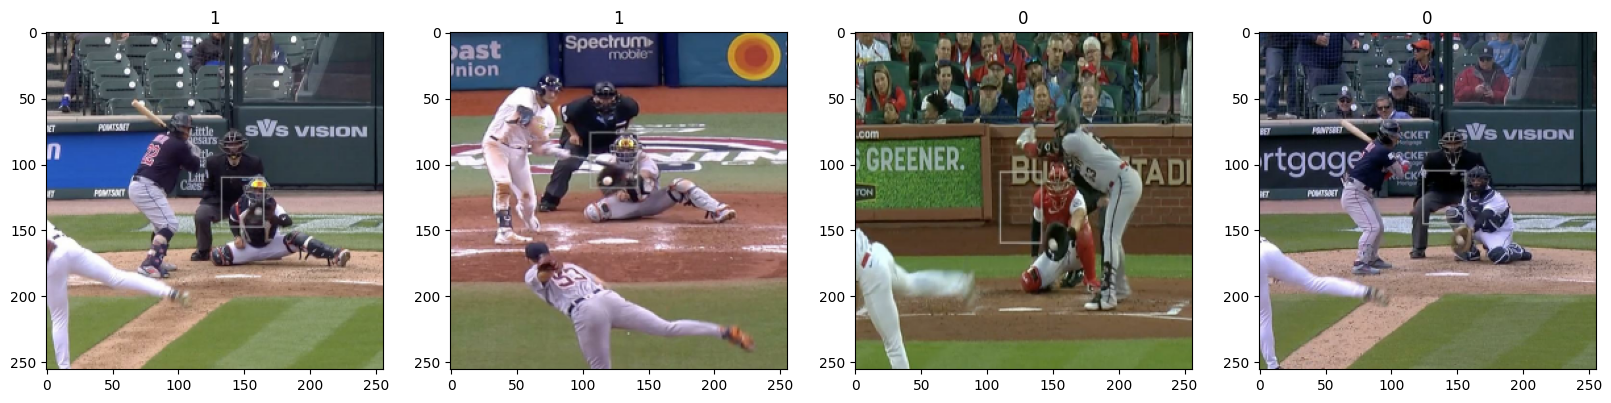

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

Making all data into one size

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.0627451 , 0.09803922, 0.08627451],
          [0.04830801, 0.09380433, 0.07811806],
          [0.03921569, 0.09803922, 0.07058824],
          ...,
          [0.03973652, 0.04365809, 0.02405025],
          [0.03775898, 0.04168055, 0.02207271],
          [0.03477328, 0.03869485, 0.01908701]],
 
         [[0.06170343, 0.10484069, 0.08915441],
          [0.05066301, 0.10039829, 0.07481498],
          [0.04785539, 0.10196079, 0.06979167],
          ...,
          [0.03685662, 0.04077819, 0.02117034],
          [0.03935906, 0.04328063, 0.02367278],
          [0.04313726, 0.04705882, 0.02745098]],
 
         [[0.06666667, 0.10980392, 0.08627451],
          [0.05333539, 0.10431579, 0.07214667],
          [0.05534453, 0.10543979, 0.07058824],
          ...,
          [0.03397672, 0.03789828, 0.01829044],
          [0.03397672, 0.03789828, 0.01829044],
          [0.03397672, 0.03789828, 0.01829044]],
 
         ...,
 
         [[0.39642838, 0.5071732 , 0.3003983 ],
          [0.38587

# 5. Split Data

Creating test, train, validation sets

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

4

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

Building the deep learning convolutional model with layers

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

Training model

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 2s 296ms/step - loss: 0.7776 - accuracy: 0.6484 - val_loss: 0.6899 - val_accuracy: 0.5625
Epoch 2/20
4/4 [==============================] - 1s 284ms/step - loss: 0.6725 - accuracy: 0.7266 - val_loss: 0.5923 - val_accuracy: 0.6875
Epoch 3/20
4/4 [==============================] - 1s 284ms/step - loss: 0.6545 - accuracy: 0.6797 - val_loss: 0.6244 - val_accuracy: 0.5938
Epoch 4/20
4/4 [==============================] - 1s 283ms/step - loss: 0.5856 - accuracy: 0.7109 - val_loss: 0.4816 - val_accuracy: 0.8438
Epoch 5/20
4/4 [==============================] - 1s 268ms/step - loss: 0.5852 - accuracy: 0.6797 - val_loss: 0.5741 - val_accuracy: 0.6562
Epoch 6/20
4/4 [==============================] - 1s 279ms/step - loss: 0.5750 - accuracy: 0.7031 - val_loss: 0.5645 - val_accuracy: 0.6875
Epoch 7/20
4/4 [==============================] - 1s 260ms/step - loss: 0.5633 - accuracy: 0.7812 - val_loss: 0.5122 - val_accuracy: 0.9062
Epoch 8/20
4/4 [====

# 8. Plot Performance

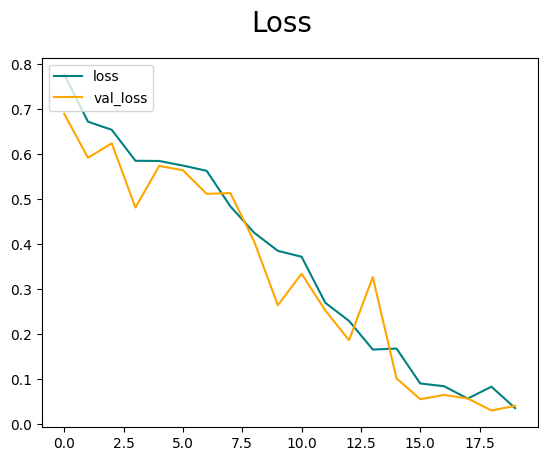

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

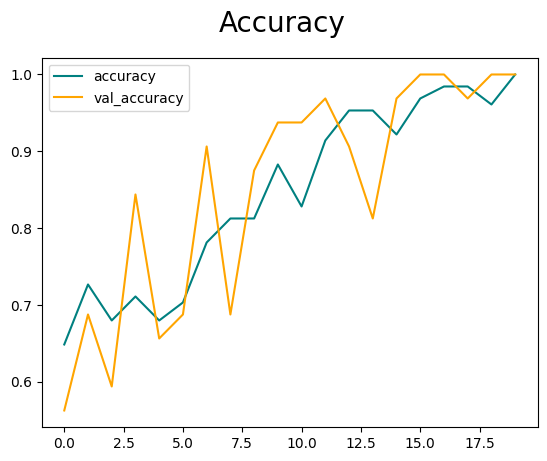

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [ ]:
import cv2

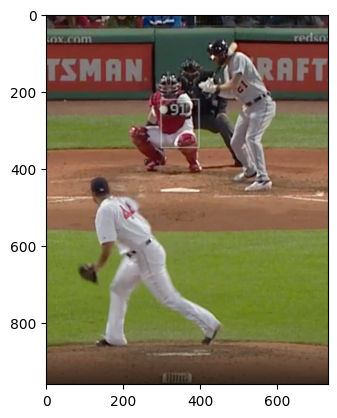

In [91]:
img = cv2.imread('prac.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

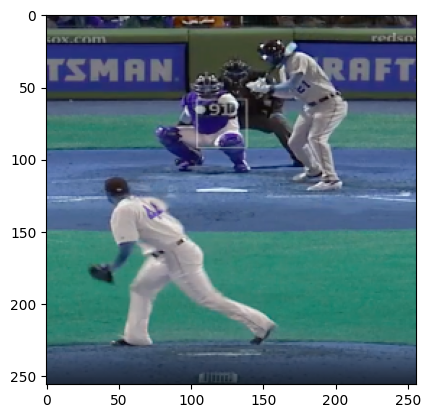

In [92]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [93]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 25ms/step


In [94]:
yhat

array([[0.60757375]], dtype=float32)

In [95]:
if yhat > 0.5: 
    print(f'Predicted class is Strike')
else:
    print(f'Predicted class is ball')

Predicted class is Strike


# 11. Save the Model

In [97]:
from tensorflow.keras.models import load_model

In [98]:
model.save(os.path.join('models','bball_1.h5'))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [100]:
new_model = load_model(os.path.join('models','bball_1.h5'))

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)